In [1]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 

save_path = os.getcwd() + '/fig'

dados = os.getcwd() + '/dados'


In [2]:
def pega_lat(vmin, vmax, nc): # pega as latitudes do corte
    lat_min = np.where(nc['latitude'][:]==vmin)
    lat_max = np.where(nc['latitude'][:]==vmax)
    return lat_min[0][0],lat_max[0][0]+1 # pra retornar o valor ao inves do array

In [3]:
def pega_lon(vmin, vmax, nc): # pega as longitudes do corte
    lon_min = np.where(nc['longitude'][:]==vmin)
    lon_max = np.where(nc['longitude'][:]==vmax)
    return lon_min[0][0],lon_max[0][0]+1

In [4]:
def faz_corte(lat_min, lat_max, lon_min, lon_max, nc): # faz o corte de acordo com a latlon
    to_return = []
    arr_w = np.asarray(nc['w'])
    for i in range(len(nc.variables['level'][:])):
        aux = map(lambda item: item[lon_max:lon_min], arr_w[0][i][lat_min:lat_max]) # aqui inverteu a lon por causa da forma que eles tratam a variavel
        to_return.append(np.asarray(list(aux)).flatten())
    return to_return

In [5]:
def faz_media(arr): # faz a media de cada nivel dos recortes
    means = []
    for i in arr:
        means.append(np.mean(i))
    return means

In [6]:
def plota_valores(medias, niveis, date): # faz o plot das medias de acordo com a altitude
    plt.plot(medias, niveis)
    ax = plt.gca()
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_ylabel('Nível (hPa)')
    ax.set_xlabel('Velocidade Vertical (m/s)')
    ax.grid()
    plt.title('Média de w na região de interesse para o dia ' + date + 'AUTO')
    plt.savefig(save_path + '/' + date[:2]+ '-' + date[3:] +'AUTO')

In [9]:
def executable(vlat_min, vlat_max, vlon_min, vlon_max, date, nc): # junta todas as funcoes
    lat_min, lat_max = pega_lat(vlat_min, vlat_max, nc)
    lon_min, lon_max = pega_lon(vlon_min, vlon_max, nc)
    # valores = faz_corte(lat_min, lat_max, lon_min, lon_max, nc)
    medias  = faz_media(faz_corte(lat_min,lat_max, lon_min, lon_max, nc))
    niveis = nc.variables['level'][:].data
    plota_valores(medias, niveis, date)

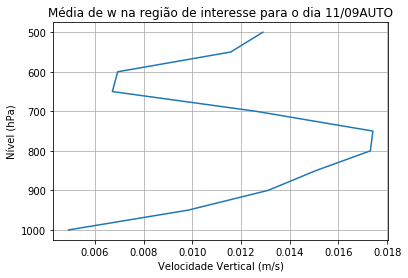

In [10]:
executable(-20, -45, -30, -60, '11/09', nc.Dataset(dados+'/'+os.listdir(dados)[0]))

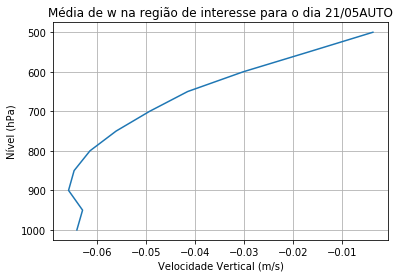

In [103]:
executable(-40, -55, -90, -105, '21/05', nc.Dataset(dados+'/'+os.listdir(dados)[1]))

## Codigo antigo, antes de tornar automatico:

In [19]:
dado = nc.Dataset(dados+'/'+os.listdir(dados)[1])

In [20]:
dado1 = nc.Dataset(dados+'/'+os.listdir(dados)[0])

In [113]:
pega_lon(-90, -105, nc.Dataset(dados+'/'+os.listdir(dados)[1]))

(160, 99)

In [114]:
nc.Dataset(dados+'/'+os.listdir(dados)[1])['longitude'][99]

masked_array(data=-105.25,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [29]:
pega_lat(-40, -55, dado)

(220, 281)

In [30]:
pega_lon(-90, -105, dado)

(160, 101)

In [34]:
### OUTRO PLOT
arr_w = np.asarray(dado['w'])




w21_05_1000_aux = map(lambda item: item[101:160], arr_w[0][10][220:281])
w21_05_1000 = np.asarray(list(w21_05_1000_aux)).flatten()

w21_05_950_aux = map(lambda item: item[101:160], arr_w[0][9][220:281])
w21_05_950 = np.asarray(list(w21_05_950_aux)).flatten()

w21_05_900_aux = map(lambda item: item[101:160], arr_w[0][8][220:281])
w21_05_900 = np.asarray(list(w21_05_900_aux)).flatten()

w21_05_850_aux = map(lambda item: item[101:160], arr_w[0][7][220:281])
w21_05_850 = np.asarray(list(w21_05_850_aux)).flatten()

w21_05_800_aux = map(lambda item: item[101:160], arr_w[0][6][220:281])
w21_05_800 = np.asarray(list(w21_05_800_aux)).flatten()

w21_05_750_aux = map(lambda item: item[101:160], arr_w[0][5][220:281])
w21_05_750 = np.asarray(list(w21_05_750_aux)).flatten()

w21_05_700_aux = map(lambda item: item[101:160], arr_w[0][4][220:281])
w21_05_700 = np.asarray(list(w21_05_700_aux)).flatten()

w21_05_650_aux = map(lambda item: item[101:160], arr_w[0][3][220:281])
w21_05_650 = np.asarray(list(w21_05_650_aux)).flatten()

w21_05_600_aux = map(lambda item: item[101:160], arr_w[0][2][220:281])
w21_05_600 = np.asarray(list(w21_05_600_aux)).flatten()

w21_05_550_aux = map(lambda item: item[101:160], arr_w[0][1][220:281])
w21_05_550 = np.asarray(list(w21_05_550_aux)).flatten()

w21_05_500_aux = map(lambda item: item[101:160], arr_w[0][0][220:281])
w21_05_500 = np.asarray(list(w21_05_500_aux)).flatten()

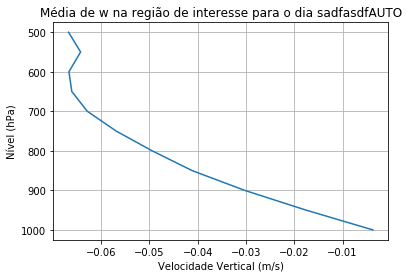

In [36]:
medias  = [np.mean(w21_05_1000), np.mean(w21_05_950),
           np.mean(w21_05_900),np.mean(w21_05_850),
           np.mean(w21_05_800), np.mean(w21_05_750),
           np.mean(w21_05_700), np.mean(w21_05_650),
           np.mean(w21_05_600), np.mean(w21_05_550),
           np.mean(w21_05_500)]
niveis = range(1000,499,-50)

medias

plota_valores(medias, niveis, 'sadfasdf')

In [117]:
w11_09_1000_aux = map(lambda item: item[280:401], arr_w[0][10][140:241])
w11_09_1000 = np.asarray(list(w11_09_1000_aux)).flatten()

w11_09_950_aux = map(lambda item: item[280:401], arr_w[0][9][140:241])
w11_09_950 = np.asarray(list(w11_09_950_aux)).flatten()

w11_09_900_aux = map(lambda item: item[280:401], arr_w[0][8][140:241])
w11_09_900 = np.asarray(list(w11_09_900_aux)).flatten()

w11_09_850_aux = map(lambda item: item[280:401], arr_w[0][7][140:241])
w11_09_850 = np.asarray(list(w11_09_850_aux)).flatten()

w11_09_800_aux = map(lambda item: item[280:401], arr_w[0][6][140:241])
w11_09_800 = np.asarray(list(w11_09_800_aux)).flatten()

w11_09_750_aux = map(lambda item: item[280:401], arr_w[0][5][140:241])
w11_09_750 = np.asarray(list(w11_09_750_aux)).flatten()

w11_09_700_aux = map(lambda item: item[280:401], arr_w[0][4][140:241])
w11_09_700 = np.asarray(list(w11_09_700_aux)).flatten()

w11_09_650_aux = map(lambda item: item[280:401], arr_w[0][3][140:241])
w11_09_650 = np.asarray(list(w11_09_650_aux)).flatten()

w11_09_600_aux = map(lambda item: item[280:401], arr_w[0][2][140:241])
w11_09_600 = np.asarray(list(w11_09_600_aux)).flatten()

w11_09_550_aux = map(lambda item: item[280:401], arr_w[0][1][140:241])
w11_09_550 = np.asarray(list(w11_09_550_aux)).flatten()

w11_09_500_aux = map(lambda item: item[280:401], arr_w[0][0][140:241])
w11_09_500 = np.asarray(list(w11_09_500_aux)).flatten()

In [118]:
medias  = [np.mean(w11_09_1000), np.mean(w11_09_950),
           np.mean(w11_09_900),np.mean(w11_09_850),
           np.mean(w11_09_800), np.mean(w11_09_750),
           np.mean(w11_09_700), np.mean(w11_09_650),
           np.mean(w11_09_600), np.mean(w11_09_550),
           np.mean(w11_09_500)]
niveis = range(1000,499,-50)

medias

[0.004933410322044902,
 0.010382844303403648,
 0.014003702953519943,
 0.01630571128219333,
 0.018317700319009506,
 0.018367333430008258,
 0.01381731478136508,
 0.007829379146063919,
 0.0076546248343240045,
 0.011971614266788682,
 0.01325656622944308]

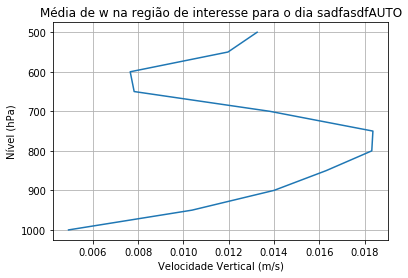

In [122]:
plota_valores(medias, niveis, 'sadfasdf')

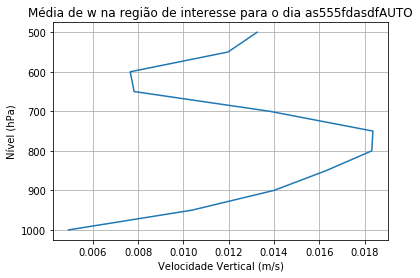

In [123]:
plota_valores([np.mean(w11_09_1000), np.mean(w11_09_950),
           np.mean(w11_09_900),np.mean(w11_09_850),
           np.mean(w11_09_800), np.mean(w11_09_750),
           np.mean(w11_09_700), np.mean(w11_09_650),
           np.mean(w11_09_600), np.mean(w11_09_550),
           np.mean(w11_09_500)],range(1000,499,-50), 'as555fdasdf' )

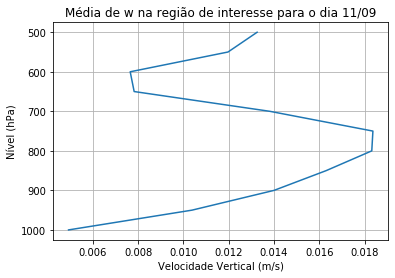

In [126]:
plt.plot(medias, niveis)
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('Nível (hPa)')
ax.set_xlabel('Velocidade Vertical (m/s)')
ax.grid()
plt.title('Média de w na região de interesse para o dia 11/09')
plt.savefig(save_path + '/11-09')

In [8]:
dado.variables['time'][0]

masked_array(data=1066752,
             mask=False,
       fill_value=999999,
            dtype=int32)

In [9]:
nc.num2date(dado.variables['time'][:].data, dado.variables['time'].units, dado.variables['time'].calendar)

array([cftime.DatetimeGregorian(2021, 9, 11, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)

In [10]:
dado2 = nc.Dataset(dados+'/'+os.listdir(dados)[1])

In [11]:
nc.num2date(dado2.variables['time'][:].data, dado.variables['time'].units, dado.variables['time'].calendar)

array([cftime.DatetimeGregorian(2021, 5, 21, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)